# Curso Introdução à Programação para Bioinformática com Python


## Módulo - Biopython


### Visualização de dados

Visualização de dados é uma importante área de estudo para Data Science
Nesta seção abordaremos alguns conceitos importantes como criação de visualizações para bioinformática com Python.

### Estudo de caso: comparando sequências de RNA ribossomal entre humanos e bactéria

![imagem.svg](https://se.wikipedia.org/wiki/Fiila:Dna-base-flipping.svg)
Estrutura do DNA. Fonte: https://se.wikipedia.org/wiki/Fiila:Dna-base-flipping.svg

Neste estudo de caso, faremos a comparação entre duas sequências de DNA: (1) **ser humano**; vs. (2) **bactéria**. 

> DNA é uma molécula presente em todos os seres vivos, que é responsável por armazenar as características hereditárias. Ela é composta por sequências de nucleotídeos, que podem de quatro tipos: adenina, timina, citosina ou guanina.

"Computacionalmente" falando podemos representá-los através de 4 letras: A, T, C ou G.


Neste estudo de caso, queremos avaliar se estruturas com funções parecidas (estamos usando sequências de RNA ribossomal) de organismos diferentes têm diferenças. Para isso vamos avaliar a quantidade de pares de nucleotídeos.

**Dados utilizados**:

- Human 18S rRNA gene, complete

Fonte: https://www.ncbi.nlm.nih.gov/nuccore/M10098.1?report=fasta


- Escherichia coli strain U 5/41 16S ribosomal RNA gene, partial sequence

Fonte: https://www.ncbi.nlm.nih.gov/nuccore/NR_024570.1?report=fasta

**Resultado final**
Como resultado final, geraremos uma figura que compara os DNAs visualmente.

### Visualização de dados gerando html

In [1]:
entrada = open("16s_bacteria.fasta").read()
saida = open("16s_bacteria.html","w")

cont_b = {}

#Laço para preencher o dicionário cont_b com os dinucleotídeos
for i in ['A', 'T', 'C', 'G']:
    for j in ['A', 'T', 'C', 'G']:
        cont_b[i+j] = 0

# Para formatar a entrada dos dados que veio do arquivo FASTA
entrada = entrada.replace("\n","")

#Laço para contar a frequência dos dinucleotídeos
for k in range(len(entrada)-1):
    cont_b[entrada[k]+entrada[k+1]] += 1
print(cont_b)

# html

saida.write("<div>")

i = 1
for k in cont_b:
    transparencia = cont_b[k]/max(cont_b.values())
    saida.write("<div style='width:100px; border:1px solid #111; color:#fff; height:100px; float:left; background-color:rgba(0, 0, 0, "+str(transparencia)+"')>"+k+"</div>")

    if i%4 == 0:
        saida.write("<div style='clear:both'></div>")

    i+=1

saida.close()

{'AA': 105, 'AT': 64, 'AC': 86, 'AG': 111, 'TA': 64, 'TT': 57, 'TC': 60, 'TG': 108, 'CA': 83, 'CT': 75, 'CC': 74, 'CG': 97, 'GA': 113, 'GT': 93, 'GC': 109, 'GG': 147}


In [2]:
entrada = open("18s_humano.fasta").read()
saida = open("18s_humano.html","w")

cont_h = {}

#Laço para preencher o dicionário cont_h com os dinucleotídeos
for i in ['A', 'T', 'C', 'G']:
    for j in ['A', 'T', 'C', 'G']:
        cont_h[i+j] = 0

#Para formatar a entrada dos dados que veio do arquivo FASTA
entrada = entrada.replace("\n","")

#Laço para contar a frequência dos dinucleotídeos
for k in range(len(entrada)-1):
    cont_h[entrada[k]+entrada[k+1]] += 1
print(cont_h)

# html
saida.write("<div>")

i = 1
for k in cont_h:
    transparencia = cont_h[k]/max(cont_h.values())
    saida.write("<div style='width:100px; border:1px solid #111; color:#fff; height:100px; float:left; background-color:rgba(0, 0, 0, "+str(transparencia)+"')>"+k+"</div>")

    if i%4 == 0:
        saida.write("<div style='clear:both'></div>")

    i+=1

saida.close()

{'AA': 116, 'AT': 95, 'AC': 97, 'AG': 113, 'TA': 85, 'TT': 113, 'TC': 109, 'TG': 111, 'CA': 87, 'CT': 105, 'CC': 184, 'CG': 170, 'GA': 134, 'GT': 105, 'GC': 155, 'GG': 184}


### Visualização de dados gerando gráfico Heatmap

In [3]:
import pandas as pd
obj = {'bactéria': cont_b, 'humano': cont_h} # Utilizando as variáveis cont_b e cont_h dos scripts anteriores
df = pd.DataFrame(data=obj)
df

,bactéria,humano
AA,105,116
AT,64,95
AC,86,97
AG,111,113
TA,64,85
TT,57,113
TC,60,109
TG,108,111
CA,83,87
CT,75,105


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
print("Setup ok!")

Setup ok!


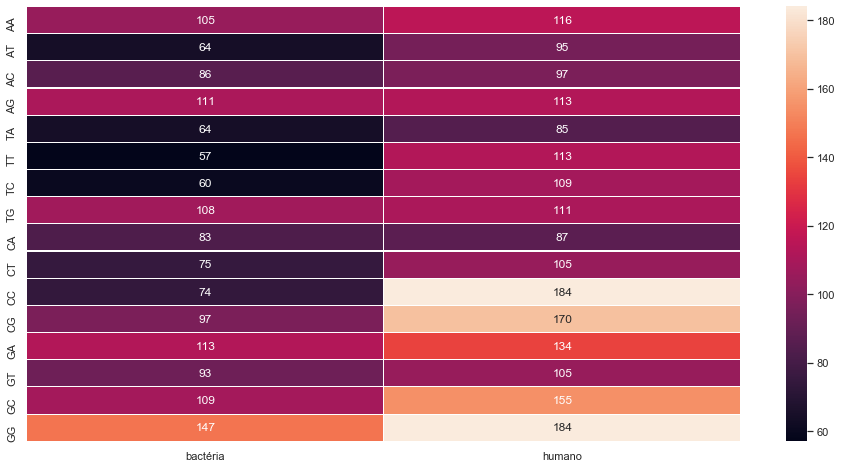

In [8]:
# Comparação de sequências de RNA ribossomal entre humanos e bactéria
plt.subplots(figsize=(16, 8))
sns.heatmap(df, annot=True, fmt="d", linewidths=.10)